In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

def plot_decision_regions(X,y,classifier,resolution=0.02):
  markers=('s','x','o','4','4')
  colors=('red','blue','lightgreen','gray','cyan')
  cmap=ListedColormap(colors[:len(np.unique(y))])

  x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
  x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
  Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z=Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

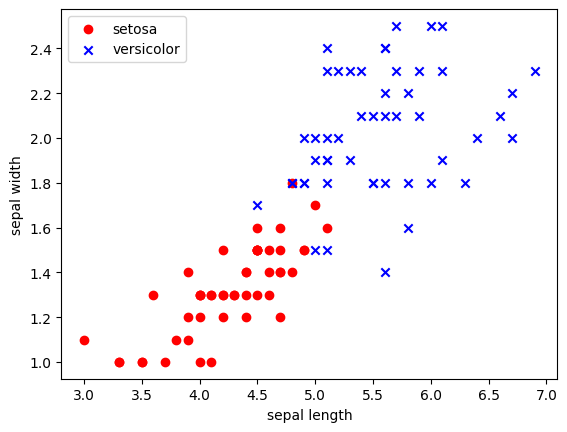

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
#print(iris.DESCR) #https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0

iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species']=[iris.target_names[i] for i in iris.target]
#iris_df.head()

#y=iris_df.iloc[0:100,4].values
y=iris_df.iloc[50:150,4].values
y=np.where(y=='versicolor',-1,1)
#print(y)

#X=iris_df.iloc[0:100,[0,1]].values
X=iris_df.iloc[50:150,[2,3]].values #[2,3] [0,2]
#print(X)

plt.scatter(X[:50,0],X[:50,1], color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

<ipython-input-1-0aa6723bee0c>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')


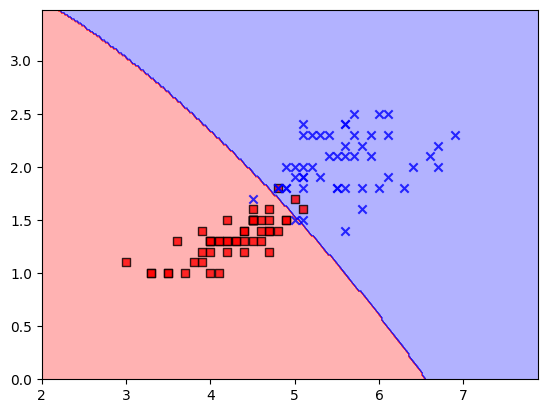

In [8]:
svm = SVC(kernel='rbf', gamma=0.1, C=10)
svm.fit(X,y)
plot_decision_regions(X,y,classifier=svm)

<ipython-input-1-0aa6723bee0c>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')


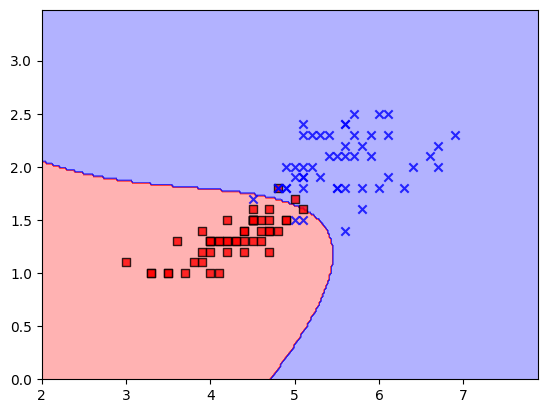

In [9]:
svm = SVC(kernel='poly', coef0=1, degree=5, C=1)
svm.fit(X,y)
plot_decision_regions(X,y,classifier=svm)